In [3]:
#In this practice I'm trying to learn classification
#I will be using the K nearest neighbour algorithm for
#classification"""

In [15]:
# IMPORTS

#using the iris dataset for practice
from sklearn.datasets import load_iris 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris_dataset=load_iris()

In [5]:
#Knowing the data

print("keys of iris_dataset: \n{}".format(iris_dataset.keys())
      +"\n \n \n") 

#The 'DESCR' key in the dataset is a short description of the dataset.
print(iris_dataset['DESCR'][:193] + "\n  \n \n")

#let's print the names of the target classes & features
print("target names: \n{}". format(iris_dataset['target_names']) 
      +"\n  \n \n")
print("Feature names: \n{}".format(iris_dataset['feature_names'])
      +"\n  \n \n")

#The data itself is contained in the 'target' and the 'data' fields
print("Type of data: \n{}".format(type(iris_dataset['data']))
      +"\n  \n \n")

#Let's see the shape of the 'data' field
print("Shape of data: \n{}".format(iris_dataset['data'].shape)
      +"\n \n \n")

#Let's print the first 5 rows of the data field
print ("First 5 rows: \n{}". format (iris_dataset['data'][0:5])
       +"\n \n \n")

#Let's now take a look at the 'target' field
print("type of target: \n{}".format(type(iris_dataset['target']))
      +"\n  \n \n")

#Shape of the target variable
print("shape of target field: \n{}".format(iris_dataset['target'].shape)
      +"\n \n \n")

#PRint the target data
print("Target: \n{}".format(iris_dataset['target']) +"\n \n \n")

keys of iris_dataset: 
dict_keys(['feature_names', 'DESCR', 'data', 'target', 'target_names'])
 
 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
  
 

target names: 
['setosa' 'versicolor' 'virginica']
  
 

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  
 

Type of data: 
<class 'numpy.ndarray'>
  
 

Shape of data: 
(150, 4)
 
 

First 5 rows: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
 
 

type of target: 
<class 'numpy.ndarray'>
  
 

shape of target field: 
(150,)
 
 

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [6]:
#TRANSFORMING THE DATA

#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                iris_dataset['target'], random_state=0)


#Let's see if training contain 75% of data 
print("X_train shape: {}".format( X_train.shape))
print("y_train shape: {}".format(y_train.shape) +"\n \n \n")


#Let's check if the test data contains 25% of data
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}". format(y_test.shape)+"\n \n \n")


X_train shape: (112, 4)
y_train shape: (112,)
 
 

X_test shape: (38, 4)
y_test shape: (38,)
 
 



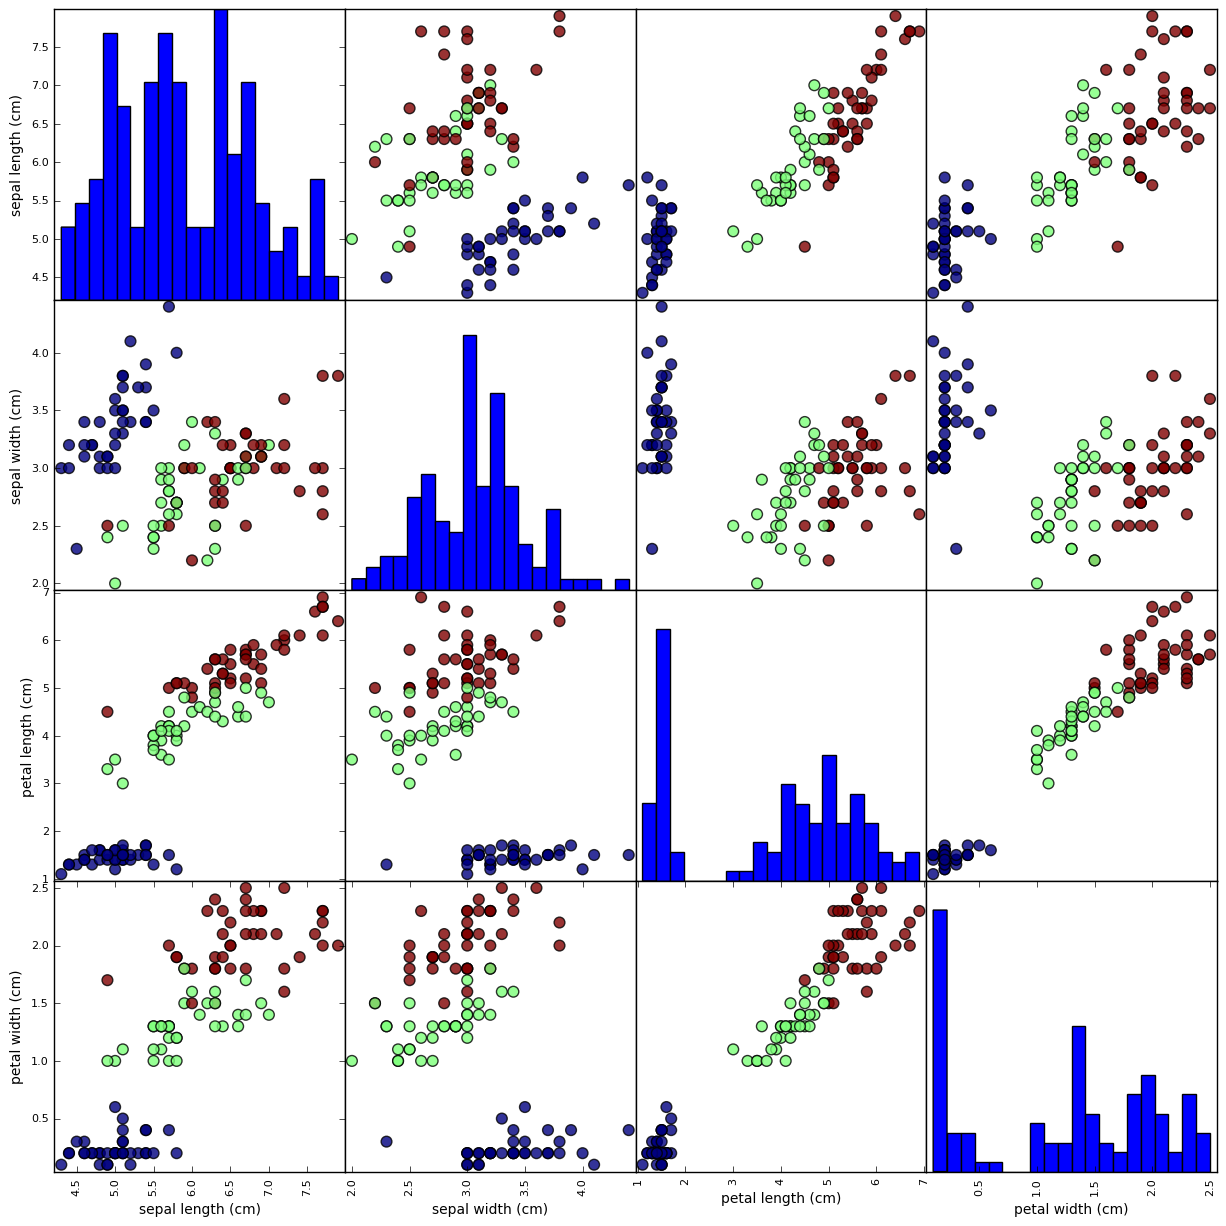

In [7]:
#VISUALIZING DATA

#create dataframe from data in X_train
#label the columns using the strings in iris.dataset.features_names

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

#create a scatter matrix from the dataframe, color by y_train

grr=pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',hist_kwds={'bins':20}, s=60, alpha=.8)
plt.show()


In [13]:
#importing the classifier from it's Estimator

#KNeighboursClassifier class/estimator is in the neighbours module in sklearn

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1) #assigning the classifier to an object 

knn.fit(X_train, y_train) #fitting the classifier on the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
X_new = np.array([[5, 2.9, 1, 0.2]]) #creating a new data set for prediction
prediction=knn.predict(X_new) #predicting the new variable
print("predicted class is: {}". format(prediction)) # printing the predicted target class
print("predicted target name:{}".format(iris_dataset['target_names'][prediction])) #printing the target name

predicted class is: [0]
predicted target name:['setosa']


In [24]:
#testing the model

y_pred = knn.predict(X_test) #predicting the target classes of our test data set
print("test set predictions:{}".format(y_pred)) # prnting the predicted classes of our test data

test set predictions:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
#Finding the prediction accuracy of the classifier by 
#printing the mean of the boolean array when the y_mean == y_test

print("test set score:{:.2f}".format(np.mean(y_pred==y_test)))


test set score:0.97


In [31]:
# Prediction accuracy can also be calculated using the knn.score method
print("test set score:{:.2f}".format(knn.score(X_test, y_test)))

test set score:0.97
